In [1]:
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


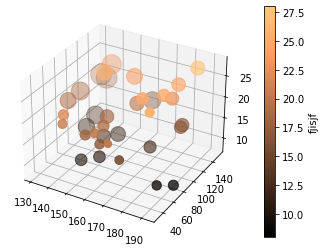

In [7]:

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
xs = np.random.randint(low=8, high=30, size=35)
ys = np.random.randint(130, 195, 35)
zs = np.random.randint(30, 160, 35)
s = zs / ((ys * 0.01) ** 2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
im = ax.scatter(ys, zs, xs, s=s * 5, c=xs, cmap='copper')
fig.colorbar(im).set_label('fjisjf')

plt.show()

AttributeError: 'Line2D' object has no attribute '_legmarker'

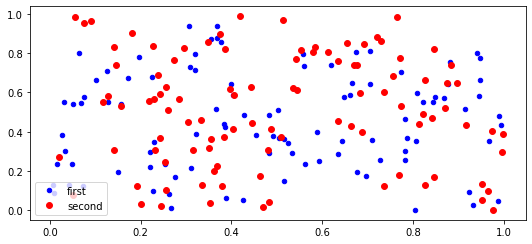

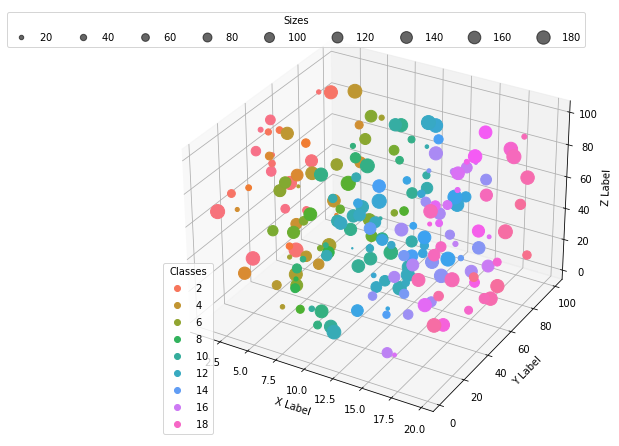

In [17]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# generate data
n = 200
x = np.random.uniform(1, 20, size=n)
y = np.random.uniform(1, 100, size=n)
z = np.random.uniform(1, 100, size=n)

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

sizes = np.random.uniform(size=(n,))*200

# plot
sc = ax.scatter(x, y, z, s=sizes, c=x, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# legend
# plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
legend1 = ax.legend(*sc.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

handles, labels = sc.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes", ncol=9)

In [33]:
def ohe_to_int(ohe):
    '''convert one hot encoded vectors to integer indices (1-8)'''
    return np.where(ohe==1)[0][0]

In [30]:
# make the case 1 plot (simple bimolecular reaction) with axis labels and legends etc.

tasks = pickle.load(open('tasks_8.pkl', 'rb'))

case_1_params = []
case_1_values = []

for t in tasks:
    c_1 = t[0]
    case_1_params.append(c_1['params'])
    case_1_values.append(c_1['values'])

In [41]:
case_1_params = np.vstack(case_1_params)
case_1_values = np.vstack(case_1_values)
print(case_1_params.shape, case_1_values.shape)

cat_ints = []
for c_1_param in case_1_params:
    cat_ints.append(
        ohe_to_int(c_1_param[:8])
    )
cat_ints = np.array(cat_ints).reshape(-1, 1)

(320, 11) (320, 1)


In [48]:
data = np.concatenate((case_1_params[:, -3:], cat_ints, case_1_values), axis=1)
print(data.shape)
data[0]

(320, 5)


array([1.02400000e+02, 2.37300000e+02, 9.74166667e-04, 7.00000000e+00,
       1.16750494e-01])

In [58]:
df = pd.DataFrame(data, columns=['T', 't_res', 'c_cat', 'c_ix', 'yield'])
df.head()

,T,t_res,c_cat,c_ix,yield
0,102.400000,237.3,0.000974,7.0,0.116750
1,63.200000,158.1,0.001497,1.0,0.115922
2,39.466667,467.7,0.002566,5.0,0.050434
3,73.866667,275.1,0.000952,2.0,0.253364
4,66.933333,235.5,0.002466,4.0,0.213907


[<matplotlib.lines.Line2D object at 0x7fdc32bb09d0>, <matplotlib.lines.Line2D object at 0x7fdc32bb06d0>, <matplotlib.lines.Line2D object at 0x7fdc32bb05d0>, <matplotlib.lines.Line2D object at 0x7fdc32bb0e50>, <matplotlib.lines.Line2D object at 0x7fdc32bb0f50>, <matplotlib.lines.Line2D object at 0x7fdc33215b50>, <matplotlib.lines.Line2D object at 0x7fdc33215150>, <matplotlib.lines.Line2D object at 0x7fdc33215e90>, <matplotlib.lines.Line2D object at 0x7fdc33215410>]
['$\\mathdefault{10}$', '$\\mathdefault{20}$', '$\\mathdefault{30}$', '$\\mathdefault{40}$', '$\\mathdefault{50}$', '$\\mathdefault{60}$', '$\\mathdefault{70}$', '$\\mathdefault{80}$', '$\\mathdefault{90}$']


/opt/anaconda3/envs/torch2/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/opt/anaconda3/envs/torch2/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


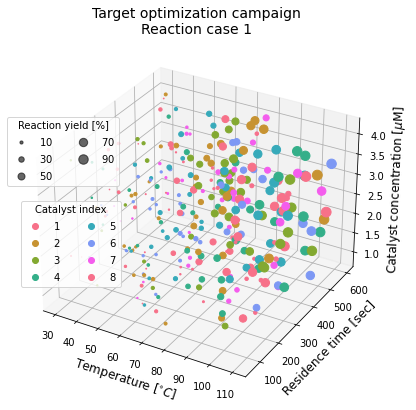

In [102]:
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

colors = df['c_ix'].values+1
sizes = df['yield'].values*100

T = df['T'].values
t_res = df['t_res'].values
c_cat = df['c_cat'].values*1000

# plot
sc = ax.scatter(T, t_res, c_cat, s=sizes, c=colors, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Temperature [$^{\circ}C$]', fontsize=12)
ax.set_ylabel('Residence time [sec]', fontsize=12)
ax.set_zlabel(r'Catalyst concentration [$\mu$M]', fontsize=12)
ax.set_title('Target optimization campaign\nReaction case 1', fontsize=14)
# legend
# plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
legend1 = ax.legend(*sc.legend_elements(),
                    loc="lower left", title="Catalyst index",
                   bbox_to_anchor=(0, 0.3), ncol=2
                )
ax.add_artist(legend1)

handles, labels = sc.legend_elements(prop="sizes", alpha=0.6)
print(handles)
print(labels)
size_indices = np.array([0, 2, 4, 6, 8])
handles_red = [handles[i] for i in size_indices]
labels_red = [labels[i] for i in size_indices]
legend2 = ax.legend(handles_red, labels_red, loc="upper right", title="Reaction yield [%]", 
                    bbox_to_anchor=(0.3, 0.8),
                    ncol=2)

plt.tight_layout()

plt.savefig('test_figure.png', dpi=400)

[<matplotlib.lines.Line2D object at 0x7fdc30760bd0>, <matplotlib.lines.Line2D object at 0x7fdc30760a10>, <matplotlib.lines.Line2D object at 0x7fdc30760b10>, <matplotlib.lines.Line2D object at 0x7fdc30760c10>, <matplotlib.lines.Line2D object at 0x7fdc30760cd0>, <matplotlib.lines.Line2D object at 0x7fdc30750850>, <matplotlib.lines.Line2D object at 0x7fdc30750a50>, <matplotlib.lines.Line2D object at 0x7fdc30750b50>, <matplotlib.lines.Line2D object at 0x7fdc30750c50>]
['$\\mathdefault{10}$', '$\\mathdefault{20}$', '$\\mathdefault{30}$', '$\\mathdefault{40}$', '$\\mathdefault{50}$', '$\\mathdefault{60}$', '$\\mathdefault{70}$', '$\\mathdefault{80}$', '$\\mathdefault{90}$']


/opt/anaconda3/envs/torch2/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


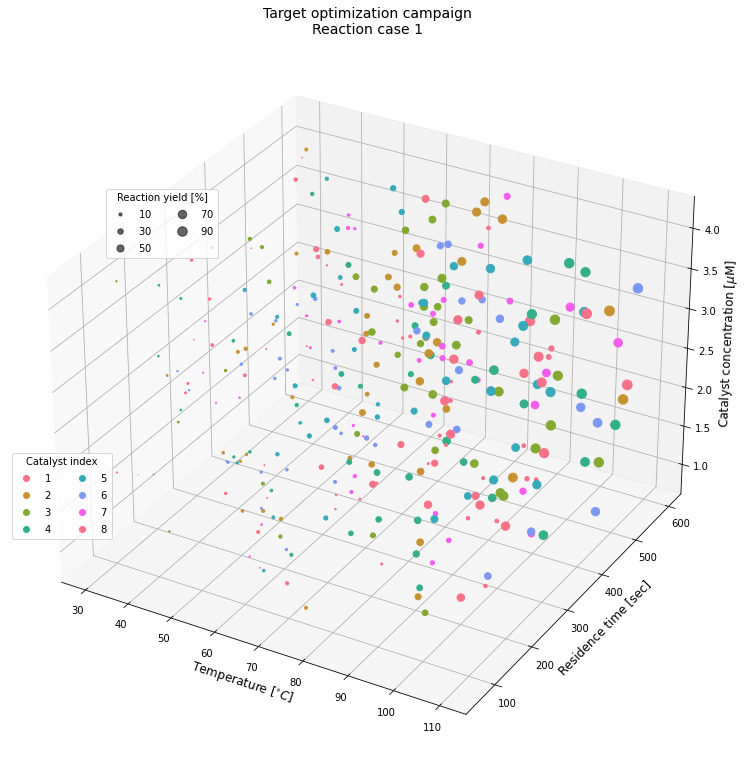

In [103]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax = fig.add_subplot(1, 2, 2, projection='3d')

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

colors = df['c_ix'].values+1
sizes = df['yield'].values*100

T = df['T'].values
t_res = df['t_res'].values
c_cat = df['c_cat'].values*1000

# plot
sc = ax.scatter(T, t_res, c_cat, s=sizes, c=colors, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Temperature [$^{\circ}C$]', fontsize=12)
ax.set_ylabel('Residence time [sec]', fontsize=12)
ax.set_zlabel(r'Catalyst concentration [$\mu$M]', fontsize=12)
ax.set_title('Target optimization campaign\nReaction case 1', fontsize=14)
# legend
# plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
legend1 = ax.legend(*sc.legend_elements(),
                    loc="lower left", title="Catalyst index",
                   bbox_to_anchor=(0, 0.3), ncol=2
                )
ax.add_artist(legend1)

handles, labels = sc.legend_elements(prop="sizes", alpha=0.6)
print(handles)
print(labels)
size_indices = np.array([0, 2, 4, 6, 8])
handles_red = [handles[i] for i in size_indices]
labels_red = [labels[i] for i in size_indices]
legend2 = ax.legend(handles_red, labels_red, loc="upper right", title="Reaction yield [%]", 
                    bbox_to_anchor=(0.3, 0.8),
                    ncol=2)

#plt.tight_layout()

#plt.savefig('test_figure.png', dpi=400)